In [ ]:
### Curso de Python para Finanças Quantitativas

#### Aula 10 - Gráficos e o Bitcoin Mayer Multiple
#### Autor: Leandro Guerra - Outspoken Market
#### Download em: https://www.outspokenmarket.com/pythonfinancasquantitativas.html

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

Mayer Multiple Indicator Chart: https://www.buybitcoinworldwide.com/mayer-multiple/ 

In [2]:
# Carrega a base
ticker = "BTC-USD"
df = yf.download(ticker, "2010-01-01", "2022-12-31")

# Cria a média de 200 períodos

mm = 200

df["MM_Longa"] = df["Adj Close"].rolling(window = mm).mean()

[*********************100%***********************]  1 of 1 completed


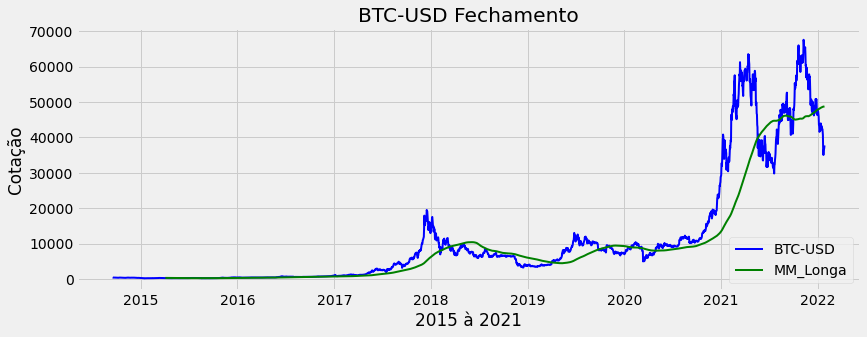

In [3]:
# Visualização

plt.figure(figsize=(12.5,4.5))
plt.plot(df["Adj Close"], label = ticker, linewidth = 2, color = "blue")
plt.plot(df["MM_Longa"], label = "MM_Longa", linewidth = 2, color = "green")
plt.title(ticker +  " Fechamento")
plt.xlabel("2015 à 2021")
plt.ylabel("Cotação")
plt.legend(loc = "lower right")
plt.show()

In [4]:
df["Mayer"] = df["Adj Close"]/df["MM_Longa"]

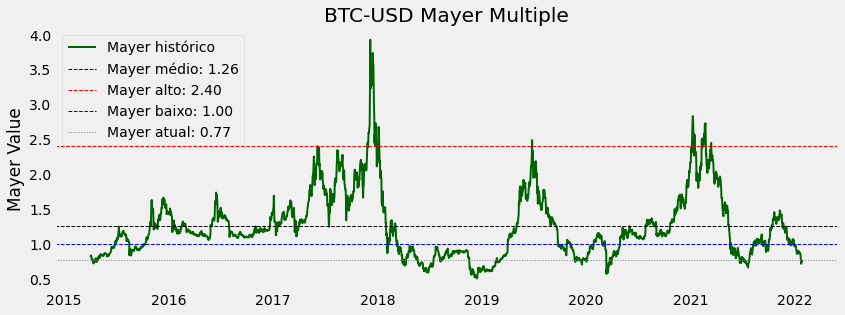

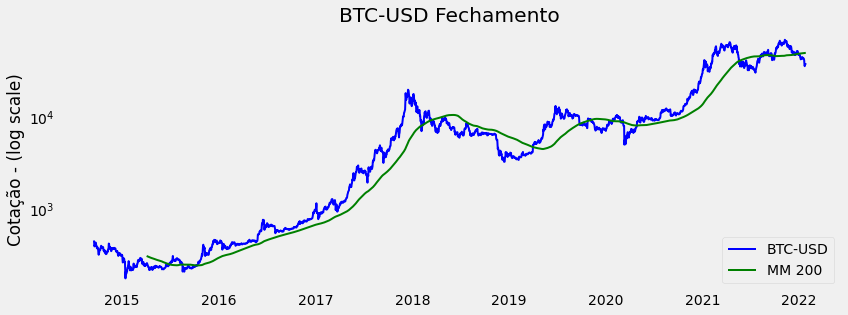

In [5]:
# Visualização Mayers


plt.figure(figsize=(12.5,4.5))
plt.plot(df["Mayer"], label = "Mayer histórico", linewidth = 2, color = "darkgreen")
plt.axhline(np.mean(df["Mayer"]), label = ("Mayer médio: " + str(np.round(np.mean(df["Mayer"]), 2)))
            , color = "black", linestyle = "dashed", linewidth = 1)
plt.axhline(2.4, label = ("Mayer alto: 2.40")
            , color = "red", linestyle = "dashed", linewidth = 1)
plt.axhline(1, label = ("Mayer baixo: 1.00")
            , color = "blue", linestyle = "dashed", linewidth = 1)
plt.axhline(df["Mayer"][-1], label = ("Mayer atual: " + str(np.round(df["Mayer"][-1], 2)))
            , color = "gray", linestyle = ":", linewidth = 1)
plt.title(ticker +  " Mayer Multiple")
#plt.xlabel("2015 à 2022")
plt.grid(b = None)
plt.ylabel("Mayer Value")
plt.legend(loc = "upper left")
plt.savefig("btc-mayer.png")
plt.show()


plt.figure(figsize=(12.5,4.5))
plt.plot(df["Adj Close"], label = ticker, linewidth = 2, color = "blue")
plt.plot(df["MM_Longa"], label = "MM 200", linewidth = 2, color = "green")
plt.title(ticker +  " Fechamento")
plt.yscale("log")
#plt.xlabel("2015 à 2021")
plt.grid(b = None)
plt.ylabel("Cotação - (log scale)")
plt.legend(loc = "lower right")
plt.savefig("btc-log.png")
plt.show()
